In [1]:
# 代码清单 6-1-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 生成数据 --------------------------------
np.random.seed(seed=0) # 固定随机数
X_min = 0
X_max = 2.5
X_n = 30
X_col = ['cornflowerblue', 'gray']          
X = np.zeros(X_n) # 输入数据
T = np.zeros(X_n, dtype=np.uint8) # 目标数据
Dist_s = [0.4, 0.8] # 分布的起始点
Dist_w = [0.8, 1.6] # 分布的范围
Pi = 0.5  # 类别 0 的比率
for n in range(X_n):
    wk = np.random.rand()
    T[n] = 0 * (wk < Pi) + 1 * (wk >= Pi) # (A)
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]] # (B)
# 显示数据 --------------------------------
print('X=' + str(np.round(X, 2)))
print('T=' + str(T))

X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


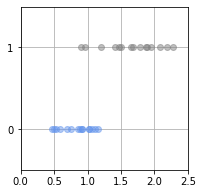

In [2]:
# 代码清单 6-1-(2)
# 显示数据的分布 ----------------------------
def show_data1(x, t):
    K = np.max(t) + 1
    for k in range(K): # (A)
        plt.plot(x[t == k], t[t == k], X_col[k], alpha=0.5,
                 linestyle='none', marker='o') # (B)
    plt.grid(True)
    plt.ylim(-.5, 1.5)
    plt.xlim(X_min, X_max)
    plt.yticks([0, 1])
    
# 主处理 ------------------------------------
fig = plt.figure(ﬁgsize=(3, 3))
show_data1(X, T)
plt.show()

In [3]:
# 代码清单 6-1-(3)
def logistic(x, w):
    y = 1 / (1 + np.exp(-(w[0] * x + w[1])))
    return y

1.25

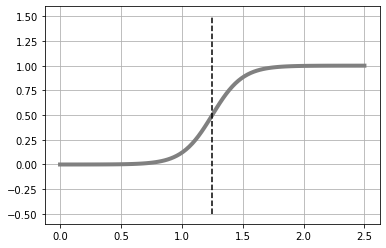

In [4]:
# 代码清单 6-1-(4)
def show_logistic(w):
    xb = np.linspace(X_min, X_max, 100)
    y = logistic(xb, w)
    plt.plot(xb, y, color='gray', linewidth=4)
    # 决策边界
    i = np.min(np.where(y > 0.5))  # (A)
    B = (xb[i - 1] + xb[i]) / 2    # (B)
    plt.plot([B, B], [-.5, 1.5], color='k', linestyle='--')
    plt.grid(True)
    return B

# test
W = [8, -10]
show_logistic(W)

In [5]:
# 代码清单 6-1-(5)
# 平均交叉熵误差 ---------------------
def cee_logistic(w, x, t):
    y = logistic(x, w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n] * np.log(y[n]) + (1 - t[n]) * np.log(1 - y[n]))
    cee = cee / X_n
    return cee

# test
W=[1,1]
cee_logistic(W, X, T)

1.0288191541851066

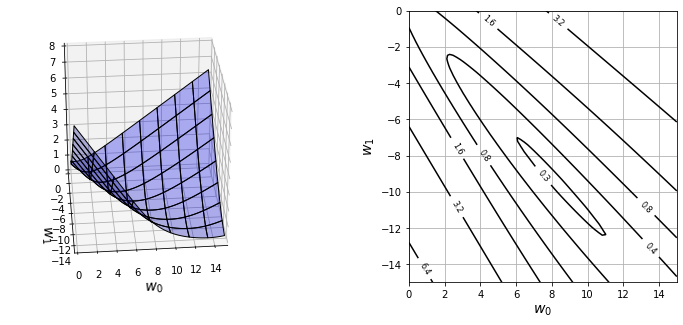

In [6]:
# 代码清单 6-1-(6)
from mpl_toolkits.mplot3d import Axes3D

# 计算 --------------------------------------
wn = 80  # 等高线的分辨率
w_range = np.array([[0, 15], [-15, 0]])
w0 = np.linspace(w_range[0, 0], w_range[0, 1], wn)
w1 = np.linspace(w_range[1, 0], w_range[1, 1], wn)
ww0, ww1 = np.meshgrid(w0, w1)
C = np.zeros((len(w1), len(w0)))             
w = np.zeros(2)
for i0 in range(wn):
    for i1 in range(wn):
        w[0] = w0[i0]
        w[1] = w1[i1]
        C[i1, i0] = cee_logistic(w, X, T)
        
# 显示 --------------------------------------
plt.ﬁgure(ﬁgsize=(12, 5))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(ww0, ww1, C, color='blue', edgecolor='black',
                rstride=10, cstride=10, alpha=0.3)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(0, 15)
ax.set_ylim(-15, 0)
ax.set_zlim(0, 8)
ax.view_init(30, -95)

plt.subplot(1, 2, 2)
cont = plt.contour(ww0, ww1, C, 20, colors='black',
                   levels=[0.26, 0.4, 0.8, 1.6, 3.2, 6.4])
cont.clabel(fmt='%.1f', fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.grid(True)
plt.show()

In [7]:
# 代码清单 6-1-(7)
# 平均交叉熵误差的导数 --------------
def dcee_logistic(w, x, t):
    y = logistic(x, w)
    dcee = np.zeros(2)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n]) * x[n]
        dcee[1] = dcee[1] + (y[n] - t[n])
    dcee = dcee / X_n
    return dcee

# --- test
W=[1, 1]
dcee_logistic(W, X, T)

array([0.30857905, 0.39485474])

w0 = 8.18, w1 = -9.38
CEE = 0.25
Boundary = 1.15 g


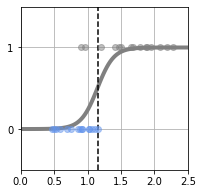

In [8]:
# 代码清单 6-1-(8)
from scipy.optimize import minimize

# 寻找参数
def fit_logistic(w_init, x, t):
    res1 = minimize(cee_logistic, w_init, args=(x, t), 
                      jac=dcee_logistic, method="CG")     # (A)
    return res1.x

# 主处理 ------------------------------------
plt.figure(1, figsize=(3, 3))
W_init=[1,-1]
W = fit_logistic(W_init, X, T)
print("w0 = {0:.2f}, w1 = {1:.2f}".format(W[0], W[1]))
B=show_logistic(W)
show_data1(X, T)
plt.ylim(-.5, 1.5)
plt.xlim(X_min, X_max)
cee = cee_logistic(W, X, T)
print("CEE = {0:.2f}".format(cee))
print("Boundary = {0:.2f} g".format(B))
plt.show()

In [9]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [10]:
# 代码清单 6-2-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 生成数据 --------------------------------
np.random.seed(seed=1)  # 固定随机数
N = 100  # 数据个数
K = 3  # 分布的个数
T3 = np.zeros((N, 3), dtype=np.uint8)
T2 = np.zeros((N, 2), dtype=np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3]  # X0 的范围，用于显示
X_range1 = [-3, 3]  # X1 的范围，用于显示
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]])  # 分布的中心
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]])  # 分布的离散值
Pi = np.array([0.4, 0.8, 1])  # (A) 各分布所占的比例 0.4 0.8 1
for n in range(N):
    wk = np.random.rand()
    for k in range(K): # (B)
        if wk < Pi[k]:
            T3[n, k] = 1
            break
    for k in range(2):
        X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k]
                   + Mu[T3[n, :] == 1, k])
T2[:, 0] = T3[:, 0]
T2[:, 1] = T3[:, 1] | T3[:, 2] 

In [11]:
# 代码清单 6-2-(2)
print(X[:5,:])

[[-0.14173827  0.86533666]
 [-0.86972023 -1.25107804]
 [-2.15442802  0.29474174]
 [ 0.75523128  0.92518889]
 [-1.10193462  0.74082534]]


In [12]:
# 代码清单 6-2-(3)
print(T2[:5,:])

[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]


In [13]:
# 代码清单 6-2-(4)
print(T3[:5,:])

[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


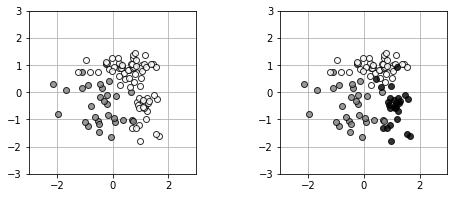

In [14]:
# 代码清单 6-2-(5)
# 显示数据 --------------------------
def show_data2(x, t):
    wk, K = t.shape
    c = [[.5, .5, .5], [1, 1, 1], [0, 0, 0]]
    for k in range(K):
        plt.plot(x[t[:, k] == 1, 0], x[t[:, k] == 1, 1],
                  linestyle='none', markeredgecolor='black',
                  marker='o', color=c[k], alpha=0.8)
    plt.grid(True)
    
# 主处理 ------------------------------
plt.figure(figsize=(7.5, 3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
show_data2(X, T2)
plt.xlim(X_range0)
plt.ylim(X_range1)

plt.subplot(1, 2, 2)
show_data2(X, T3)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

In [15]:
# 代码清单 6-2-(6)
# 逻辑回归模型 -----------------
def logistic2(x0, x1, w):
    y = 1 / (1 + np.exp(-(w[0] * x0 + w[1] * x1 + w[2])))
    return y

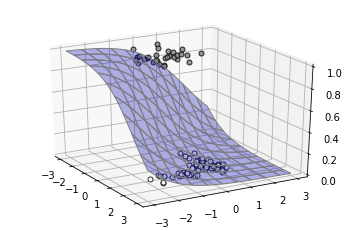

In [16]:
# 代码清单 6-2-(7)
# 在三维立体图形上显示模型 ------------------------------
from mpl_toolkits.mplot3d import axes3d

def show3d_logistic2(ax, w):
    xn = 50
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    ax.plot_surface(xx0, xx1, y, color='blue', edgecolor='gray',
                    rstride=5, cstride=5, alpha=0.3)
    
def show_data2_3d(ax, x, t):
    c = [[.5, .5, .5], [1, 1, 1]]
    for i in range(2):
        ax.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], 1 - i,
                marker='o', color=c[i], markeredgecolor='black',
                linestyle='none', markersize=5, alpha=0.8)
    ax.view_init(elev=25, azim=-30)

    # test ---
Ax = plt.subplot(1, 1, 1, projection='3d')
W=[-1, -1, -1]
show3d_logistic2(Ax, W)
show_data2_3d(Ax,X,T2)
plt.show()

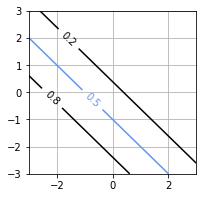

In [17]:
# 代码清单 6-2-(8)
# 以二维等高线的形式显示模型 ------------------------
def show_contour_logistic2(w):
    xn = 30  # 要生成的采样点个数
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    cont = plt.contour(xx0, xx1, y, levels=(0.2, 0.5, 0.8),
                       colors=['k', 'cornflowerblue', 'k'])
    cont.clabel(fmt='%.1f', fontsize=10)
    plt.grid(True)

# test ---
plt.figure(figsize=(3,3))
W=[-1, -1, -1]
show_contour_logistic2(W)
plt.show()

In [18]:
# 代码清单 6-2-(9)
# 交叉熵误差 ------------
def cee_logistic2(w, x, t):
    X_n = x.shape[0]
    y = logistic2(x[:, 0], x[:, 1], w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n, 0] * np.log(y[n]) +
                     (1 - t[n, 0]) * np.log(1 - y[n]))
    cee = cee / X_n
    return cee

In [19]:
# 代码清单 6-2-(10)
# 交叉熵误差的导数 ------------
def dcee_logistic2(w, x, t):
    X_n=x.shape[0]
    y = logistic2(x[:, 0], x[:, 1], w)
    dcee = np.zeros(3)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n, 0]) * x[n, 0]
        dcee[1] = dcee[1] + (y[n] - t[n, 0]) * x[n, 1]
        dcee[2] = dcee[2] + (y[n] - t[n, 0])
    dcee = dcee / X_n
    return dcee

# test ---
W=[-1, -1, -1]
dcee_logistic2(W, X, T2)

array([ 0.10272008,  0.04450983, -0.06307245])

w0 = -3.70, w1 = -2.54, w2 = -0.28
CEE = 0.22


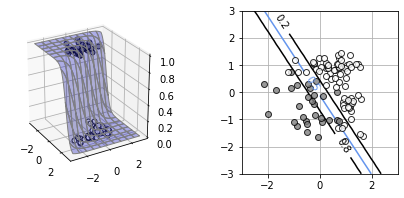

In [20]:
# 代码清单 6-2-(11)
from scipy.optimize import minimize

# 寻找逻辑回归模型的参数 --
def fit_logistic2(w_init, x, t):
    res = minimize(cee_logistic2, w_init, args=(x, t),
                   jac=dcee_logistic2, method="CG")
    return res.x

# 主处理 ------------------------------------
plt.figure(1, figsize=(7, 3))
plt.subplots_adjust(wspace=0.5)

Ax = plt.subplot(1, 2, 1, projection='3d')
W_init = [-1, 0, 0]
W = fit_logistic2(W_init, X, T2)
print("w0 = {0:.2f}, w1 = {1:.2f}, w2 = {2:.2f}".format(W[0], W[1], W[2]))
show3d_logistic2(Ax, W)
show_data2_3d(Ax, X, T2)
cee = cee_logistic2(W, X, T2)
print("CEE = {0:.2f}".format(cee))

Ax = plt.subplot(1, 2, 2)
show_data2(X, T2)
show_contour_logistic2(W)
plt.show()

In [21]:
# 代码清单 6-2-(12)
#  三元分类用的逻辑回归模型 -----------------

def logistic3(x0, x1, w):
    K = 3
    w = w.reshape((3, 3))
    n = len(x1)
    y = np.zeros((n, K))
    for k in range(K):
        y[:, k] = np.exp(w[k, 0] * x0 + w[k, 1] * x1 + w[k, 2])
    wk = np.sum(y, axis=1)
    wk = y.T / wk
    y = wk.T
    return y

# test ---
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
y = logistic3(X[:3, 0], X[:3, 1], W)
print(np.round(y, 3))

[[0.    0.006 0.994]
 [0.965 0.033 0.001]
 [0.925 0.07  0.005]]


In [22]:
# 代码清单 6-2-(13)
# 交叉熵误差 ------------
def cee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = logistic3(x[:, 0], x[:, 1], w)
    cee = 0
    N, K = y.shape
    for n in range(N):
        for k in range(K):
            cee = cee - (t[n, k] * np.log(y[n, k]))
    cee = cee / X_n
    return cee

# test ----
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
cee_logistic3(W, X, T3)

3.9824582404787288

In [23]:
# 代码清单 6-2-(14)
# 交叉熵误差的导数 ------------
def dcee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = logistic3(x[:, 0], x[:, 1], w)
    dcee = np.zeros((3, 3))  # （类别数 K） × （x 的维度 D + 1）
    N, K = y.shape
    for n in range(N):
        for k in range(K):
            dcee[k, :] = dcee[k, :] - (t[n, k] - y[n, k])* np.r_[x[n, :], 1]
    dcee = dcee / X_n
    return dcee.reshape(-1)

# test ----
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
dcee_logistic3(W, X, T3)

array([ 0.03778433,  0.03708109, -0.1841851 , -0.21235188, -0.44408101,
       -0.38340835,  0.17456754,  0.40699992,  0.56759346])

In [24]:
# 代码清单 6-2-(15)
# 寻找参数 -----------------
def fit_logistic3(w_init, x, t):
    res = minimize(cee_logistic3, w_init, args=(x, t),
                   jac=dcee_logistic3, method="CG")
    return res.x

In [25]:
# 代码清单 6-2-(16)
# 以二维等高线的形式显示模型 --------------------
def show_contour_logistic3(w):
    xn = 30  # 要生成的采样点个数
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    
    xx0, xx1 = np.meshgrid(x0, x1)
    y = np.zeros((xn, xn, 3))
    for i in range(xn):
        wk = logistic3(xx0[:, i], xx1[:, i], w)
        for j in range(3):
            y[:, i, j] = wk[:, j]
    for j in range(3):
        cont = plt.contour(xx0, xx1, y[:, :, j],
                             levels=(0.5, 0.9), 
                             colors=['cornflowerblue', 'k'])
        cont.clabel(fmt='%.1f', fontsize=9)
    plt.grid(True)

[[-3.2  -2.69  2.25]
 [-0.49  4.8  -0.69]
 [ 3.68 -2.11 -1.56]]
CEE = 0.23


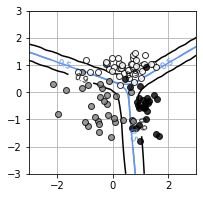

In [26]:
# 代码清单 6-2-(17)
# 主处理 ------------------------------------
W_init = np.zeros((3, 3))
W = fit_logistic3(W_init, X, T3)
print(np.round(W.reshape((3, 3)),2))
cee = cee_logistic3(W, X, T3)
print("CEE = {0:.2f}".format(cee))

plt.figure(figsize=(3, 3))
show_data2(X, T3)
show_contour_logistic3(W)
plt.show()